In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 기본적인

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
print(rdkit.__version__)

2020.09.3


In [2]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

In [3]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True
IPythonConsole.ipython_useSVG = True

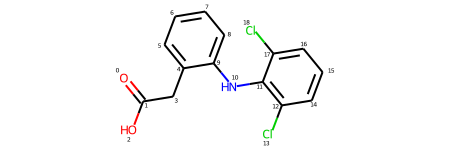

In [5]:
diclofenac

In [ ]:
view = Draw.MolsToGridImage([diclofenac])
view

## 새로운 방식

The 2020.03 release includes a set of significant improvements to the RDKit molecule drawing code.  
http://rdkit.blogspot.com/2020/04/new-drawing-options-in-202003-release.html

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.09.3


In [14]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')

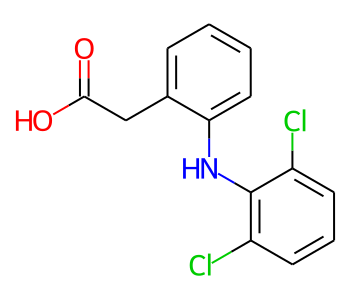

In [15]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)  # 가로, 세로 길이
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## Atom and bond indices

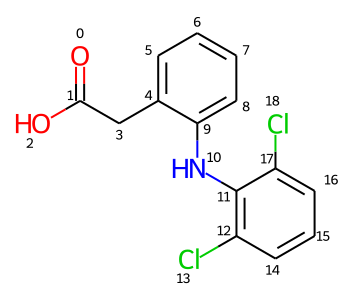

In [16]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300) # d2d는 draw 2d의 약자
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

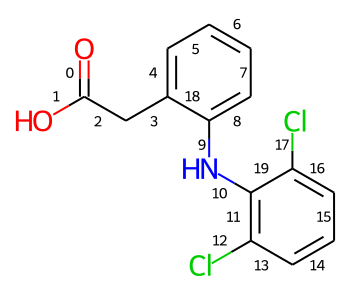

In [17]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

## Stereochemistry

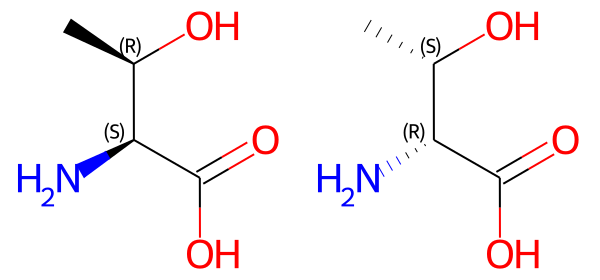

In [18]:
l_threonine = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O')
d_threonine = Chem.MolFromSmiles('C[C@H](O)[C@@H](N)C(O)=O')

d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_threonine,d_threonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

Note: the RDKit code that does CIP assignments (i.e. R/S and E/Z assignment) is not a faithful implementation of the CIP rules, which are complicated.